In [106]:
from datasets import load_dataset

import pandas as pd
import matplotlib.pyplot as plt



In [9]:

# Load the dataset
dataset = load_dataset('dair-ai/emotion')

# Convert to pandas dataframe
train_data = pd.DataFrame(dataset['train'])
val_data = pd.DataFrame(dataset['validation'])
test_data = pd.DataFrame(dataset['test'])

print(train_data.head())
print(test_data.head())

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [3]:
train_data['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

In [4]:
train_data = train_data.drop_duplicates(subset='text')
train_data = train_data.reset_index(drop=True)

In [5]:
train_data.isna().values.any()

False

In [6]:
train_data['len'] = [len(text.split()) for text in train_data['text']]

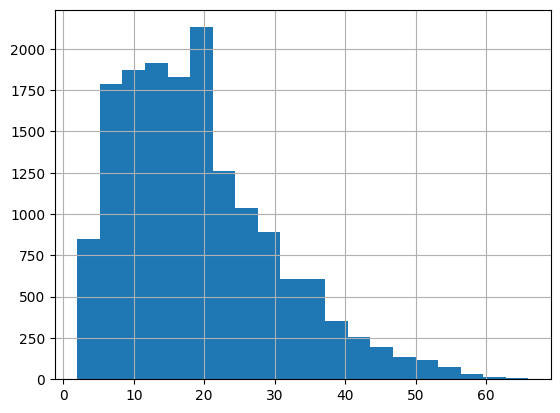

In [7]:
train_data['len'].hist(bins=20)
plt.show()

# ChatGPT

In [20]:
import openai

openai.api_key = 'api key ne pokaju))'


def get_gpt_response(text):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are a helpful assistant that identifies one of sadness, joy, love, anger, fear, and surprise emotions in text. Chose the most suitable emotion from the list [sadness, joy, love, anger, fear, surprise]. Each text represent only one emotion. Give only one word representing text emotion in answer."},
            {"role": "user", "content": f"Identify the emotion in the following text: '{text}'"},
        ]
    )
    result = 'unk'
    labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    for label in labels:
        if label in response['choices'][0]['message']['content'].lower():
            result = label
            break
    return result
    



In [98]:
import time

train_preds = {}
max_attempts = 100

train_preds_list = []

for text in tqdm(train_data['text']):
    for attempt in range(max_attempts):
        try:
            output = get_gpt_response(text)
            train_preds[text] = output
            train_preds_list.append(output)
            break
        except:
            time.sleep(5)
train_data['preds'] = train_preds_list

  0%|          | 0/16000 [00:00<?, ?it/s]

In [99]:
import time

val_preds = {}
max_attempts = 100

val_preds_list = []

for text in tqdm(val_data['text']):
    for attempt in range(max_attempts):
        try:
            output = get_gpt_response(text)
            val_preds[text] = output
            val_preds_list.append(output)
            break
        except:
            print('exception')
            time.sleep(5)
val_data['preds'] = val_preds_list

  0%|          | 0/2000 [00:00<?, ?it/s]

exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception


In [102]:
names = {'sadness':0,'joy':1,'love':2,'anger':3,'fear':4, 'surprise':5, 'unk':6}
preds_label = [names[label] for label in train_data['preds']]
train_data['gpt_preds'] = preds_label

In [103]:
names = {'sadness':0,'joy':1,'love':2,'anger':3,'fear':4, 'surprise':5, 'unk':6}
preds_label = [names[label] for label in val_data['preds']]
val_data['gpt_preds'] = preds_label

In [104]:
names = {'sadness':0,'joy':1,'love':2,'anger':3,'fear':4, 'surprise':5, 'unk':6}
preds_label = [names[label] for label in test_data['preds']]
test_data['gpt_preds'] = preds_label

In [105]:
train_data.to_csv('train_emotions_gpt.csv', index=False)
val_data.to_csv('val_emotions_gpt.csv', index=False)
test_data.to_csv('test_emotions_gpt.csv', index=False)

In [59]:
f1_score(clean_test_data['label'], preds_label, average='macro')

0.4843521937536555

In [66]:
clean_test_data

,text,label,preds,norm_preds
0,im feeling rather rotten so im not very ambiti...,0,sadness,0
1,im updating my blog because i feel shitty,0,sadness,0
2,i never make her separate from me because i do...,0,love,2
3,i left with my bouquet of red and yellow tulip...,1,joy,1
4,i was feeling a little vain when i did this one,0,joy,1
...,...,...,...,...
1995,i just keep feeling like someone is being unki...,3,anger,3
1996,im feeling a little cranky negative after this...,3,sadness,0
1997,i feel that i am useful to my people and that ...,1,joy,1
1998,im feeling more comfortable with derby i feel ...,1,joy,1


In [70]:
mistakes = clean_test_data[clean_test_data['label']!=clean_test_data['norm_preds']]

In [72]:
names

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [95]:
i += 1
print(mistakes.iloc[i, 0])
print(mistakes.iloc[i, 1])
print(mistakes.iloc[i, 3])





i spent wandering around still kinda dazed and not feeling particularly sociable but because id been in hiding for a couple for days and it was getting to be a little unhealthy i made myself go down to the cross and hang out with folks
1
0


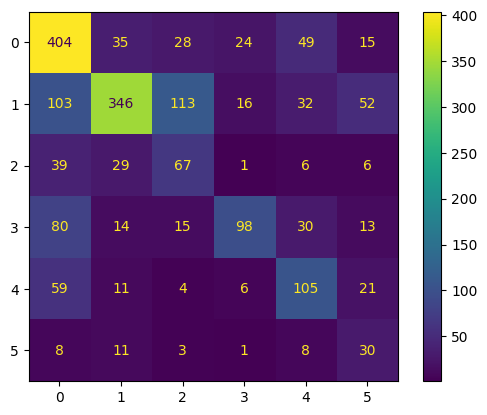

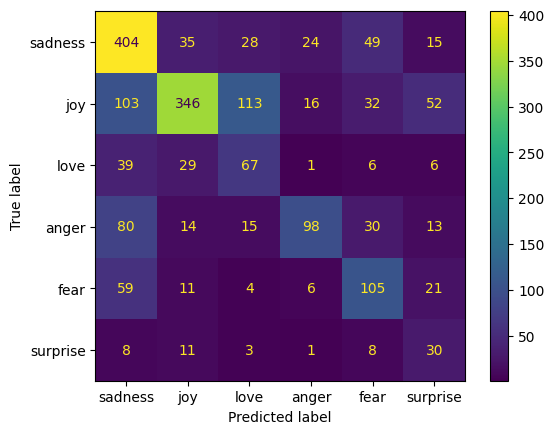

In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(clean_test_data['label'], clean_test_data['norm_preds'] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
                              )
disp.plot()

plt.show()

In [19]:
text = test_data['text'][4]
response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are a helpful assistant that identifies one of sadness, joy, love, anger, fear, and surprise emotions in text. Chose the most suitable emotion frmo the list [sadness, joy, love, anger, fear, surprise]. Each text represent only one emotion. Give only one word representing text emotion in answer."},
            {"role": "user", "content": f"Identify the emotion in the following text: '{text}'"},
        ]
    )
response['choices'][0]['message']['content']

'Joy.'